# Implementing the Gradient Descent Algorithm

In this notebook, you'll be implementing the functions that build the gradient descent algorithm, namely:

* `sigmoid`: The sigmoid activation function.
* `output_formula`: The formula for the prediction.
* `error_formula`: The formula for the error at a point.
* `update_weights`: The function that updates the parameters with one gradient descent step.

Your goal is to find the boundary on a small dataset that has two classes:

![auaghsga](points.png "test")

After you implement the gradient descent functions, be sure to run the `train` function. This will graph several of the lines that are drawn in successive gradient descent steps. It will also graph the error function, and you'll be able to see it decreasing as the number of epochs grows.

First, we'll start with some functions that will help us plot and visualize the data.

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

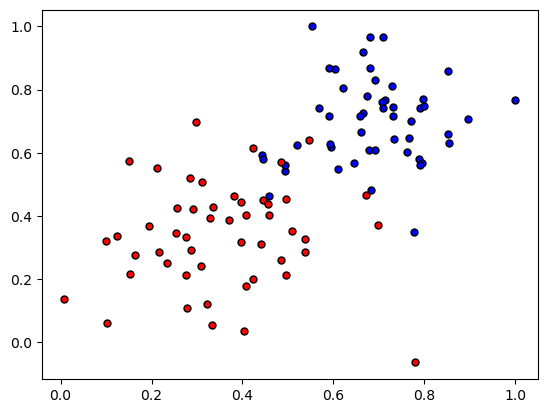

In [59]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    '''
    Input: x is an array of points
    '''

    #print(f'sigmoid: {1/(1+np.exp(-np.array(x, dtype=float)))} \n')
    
    return 1/(1+np.exp(-np.array(x, dtype=float))) 

# Output (prediction) formula
def output_formula(features, weights, bias):
    '''
    Input
        features: array of points
        weights: array of weights
        b: bias
    Returns the prediction of what the line should look like
    '''

    # multiply all the features by their weights and sum them up
    # then add the bias

    output = sigmoid(np.dot(features, weights) + bias)
    #print(f'output: {output} \n')
    
    return output

# Error (log-loss) formula
def error_formula(y, output):
    '''
    Input
        y: actual value
        output: prediction
    Returns the error of the prediction
    '''
    error = -y * np.log(output) - (1-y) * np.log(1-output)
    #print(f'error: {error} \n')
    
    return error
    

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    '''
    Input
        x: array of points
        y: actual value
        weights: array of weights
        bias: bias
        learnrate: learning rate
    Returns the updated weights and bias
    '''

    # call the output_formula to get the prediction
    output = output_formula(x, weights, bias)
    
    # calculate the error by subtracting the prediction from the actual value
    error = y - output
    
    # update the weights
    weights[0] += learnrate * error * x[0] 
    weights[1] += learnrate * error * x[1]

    # update the bias
    bias += learnrate * error
   
    # print(f'weights: {weights} \n')
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [61]:
np.random.seed(44)

epochs = 100
# epochs = 3
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

sigmoid: 0.3837809306001246 

output: 0.3837809306001246 

error: 0.9576833824164324 

sigmoid: 0.3837809306001246 

output: 0.3837809306001246 

weights: [-0.52595511  0.93041285] 

sigmoid: 0.5314426712927987 

output: 0.5314426712927987 

error: 0.6321599491196473 

sigmoid: 0.5314426712927987 

output: 0.5314426712927987 

weights: [-0.52460688  0.93177818] 

sigmoid: 0.49096164029122774 

output: 0.49096164029122774 

error: 0.711389279919367 

sigmoid: 0.49096164029122774 

output: 0.49096164029122774 

weights: [-0.52253438  0.93268824] 

sigmoid: 0.563779650103952 

output: 0.563779650103952 

error: 0.5730917951288598 

sigmoid: 0.563779650103952 

output: 0.563779650103952 

weights: [-0.52125931  0.93452778] 

sigmoid: 0.5210729596510185 

output: 0.5210729596510185 

error: 0.6518652093152502 

sigmoid: 0.5210729596510185 

output: 0.5210729596510185 

weights: [-0.51882052  0.93621628] 

sigmoid: 0.4955164762767617 

output: 0.4955164762767617 

error: 0.7021546739450213 


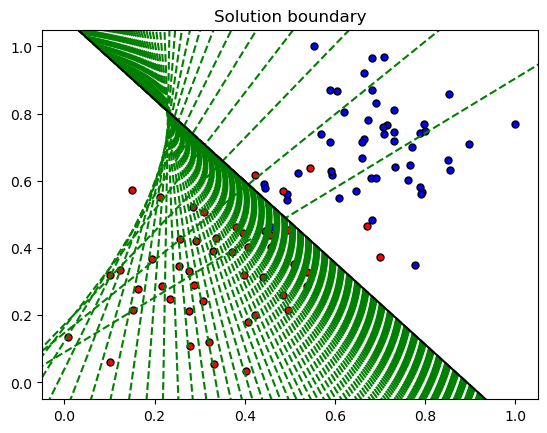

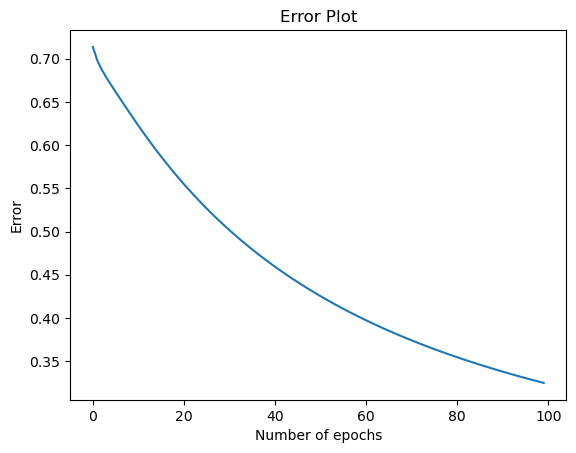

In [62]:
train(X, y, epochs, learnrate, True)